In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib as plt
from torch.utils.data import DataLoader
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import _LRScheduler

%run '/kaggle/input/icdar19-wsegs-cte-dataloader/CTE.ipynb'
%run '/kaggle/input/icdar19-wsegs-cte-dataloader/dataloader_ICDAR19_lsegs.ipynb'


import numpy as np
import os

torch.Size([1, 105])


In [2]:
class LabelSomCE(nn.Module):
	def __init__(self):
		super().__init__()

	def forward(self,x,target,smoothing=0.1):
		confidence = 1.0 - smoothing
		logprobs = F.log_softmax(x,dim=-1)
		nll_loss = - logprobs.gather(dim=-1,index=target.unsqueeze(1))
		nll_loss = nll_loss.squeeze(1)
		smooth_loss = -logprobs.mean(dim=-1)
		loss = confidence * nll_loss + smoothing * smooth_loss

		return loss.mean()

def download(folder,thetarfile):
    import urllib.request
    import tarfile
    ftpstream = urllib.request.urlopen(thetarfile)
    thetarfile = tarfile.open(fileobj=ftpstream, mode="r|gz")
    thetarfile.extractall(folder)
    thetarfile.close()

def download_cerug(folder):
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/CERUG-EN-train-images.tar.gz"
    download(folder,thetarfile)
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/CERUG-EN-test-images.tar.gz"
    download(folder,thetarfile)

def download_firemaker(folder):
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/Firemaker-train-images.tar.gz"
    download(folder,thetarfile)
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/Firemaker-test-images.tar.gz"
    download(folder,thetarfile)


ICDAR19_wsegsICDAR19_wsegswriter_index_table.pickle
----------
loading dataset /kaggle/input/icdar19-wsegs/icdar19_wsegs with images: 109391
number of writer is: 511
-*-*-*-*-*-*-*-*-*-*
ICDAR19_wsegsICDAR19_wsegswriter_index_table.pickle
----------
loading dataset /kaggle/input/icdar19-wsegs/icdar19_wsegs with images: 15432
number of writer is: 511
-*-*-*-*-*-*-*-*-*-*
Traing epoch: 0   avg loss is: 5.238086444721925
Testing epoch: 0   avg testing loss is: 3.200838268606156
Testing on epoch: 0 has accuracy: top1: 47.90 top5: 71.47


/tmp/ipykernel_24/3984756086.py:133: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Testing on epoch: %d has accuracy: top1: %.2f top5: %.2f'%(epoch,top1*100,top5*100))
/tmp/ipykernel_24/3984756086.py:135: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fp.write('Testing epoch %d accuracy is: top1: %.2f top5: %.2f\n'%(epoch,top1*100,top5*100))


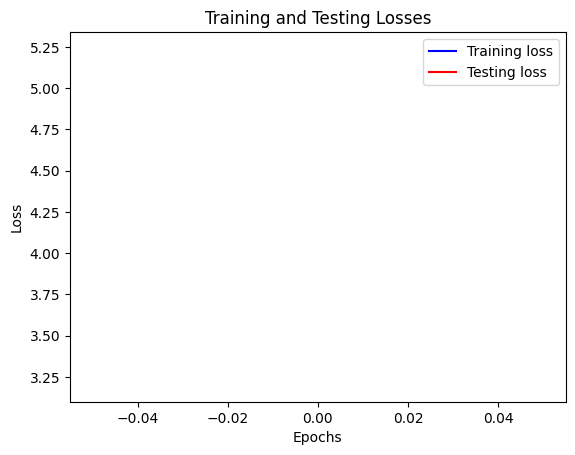

Traing epoch: 1   avg loss is: 2.7354660000697852
Testing epoch: 1   avg testing loss is: 2.4123288152131392
Testing on epoch: 1 has accuracy: top1: 67.83 top5: 86.64


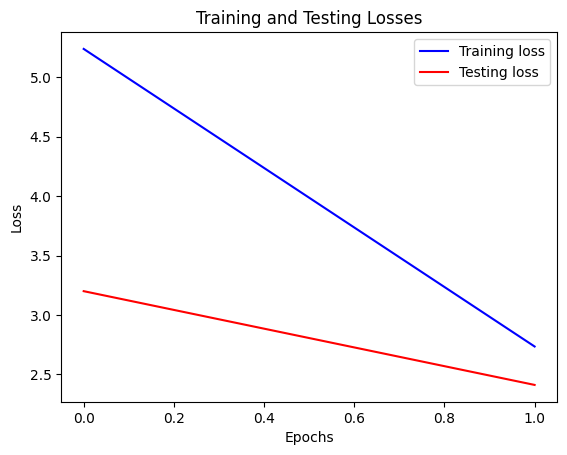

Traing epoch: 2   avg loss is: 2.268782610656784
Testing epoch: 2   avg testing loss is: 2.20340331082517
Testing on epoch: 2 has accuracy: top1: 73.02 top5: 90.38


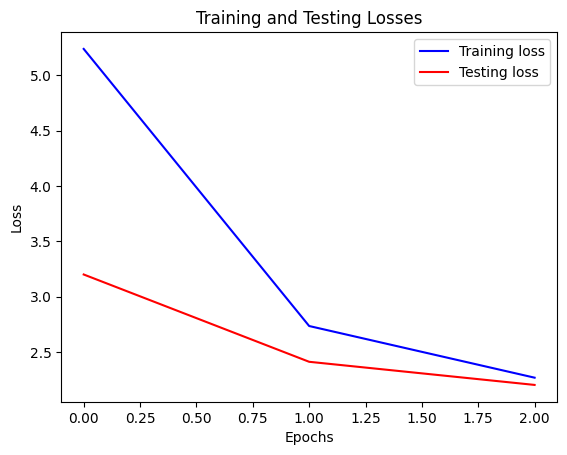

Traing epoch: 3   avg loss is: 2.0320804177354552
Testing epoch: 3   avg testing loss is: 2.0062215062620727
Testing on epoch: 3 has accuracy: top1: 78.01 top5: 92.57


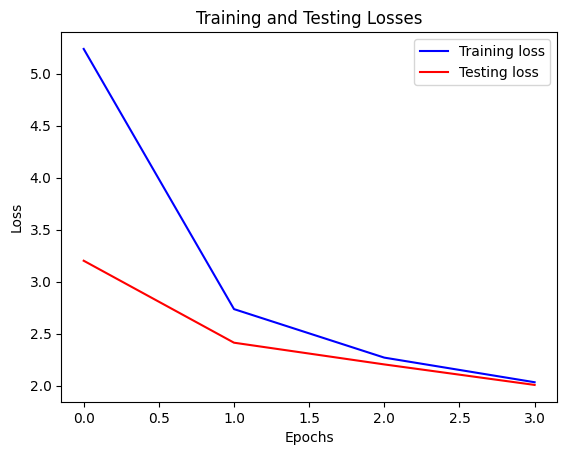

Traing epoch: 4   avg loss is: 1.8835310844596609
Testing epoch: 4   avg testing loss is: 1.8423695276438263
Testing on epoch: 4 has accuracy: top1: 83.33 top5: 94.41


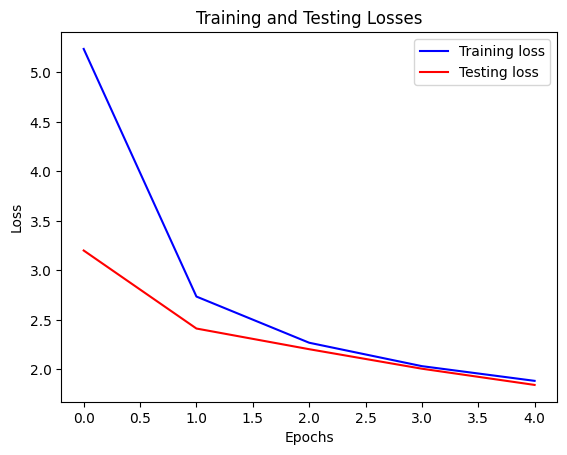

Traing epoch: 5   avg loss is: 1.7784391738749026
Testing epoch: 5   avg testing loss is: 1.7755808348482756
Testing on epoch: 5 has accuracy: top1: 85.05 top5: 95.04


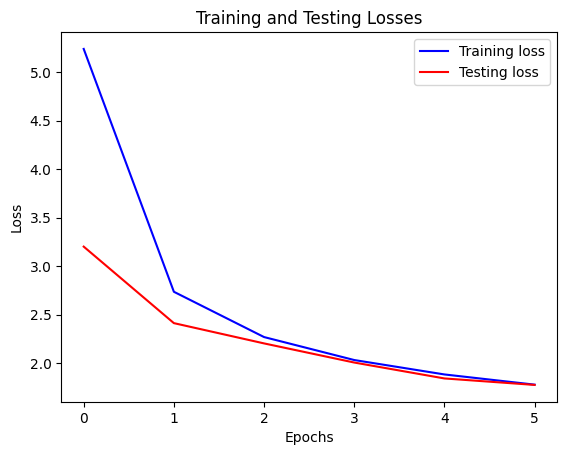

Traing epoch: 6   avg loss is: 1.6958224783695672
Testing epoch: 6   avg testing loss is: 1.7684218953928181
Testing on epoch: 6 has accuracy: top1: 84.55 top5: 94.67


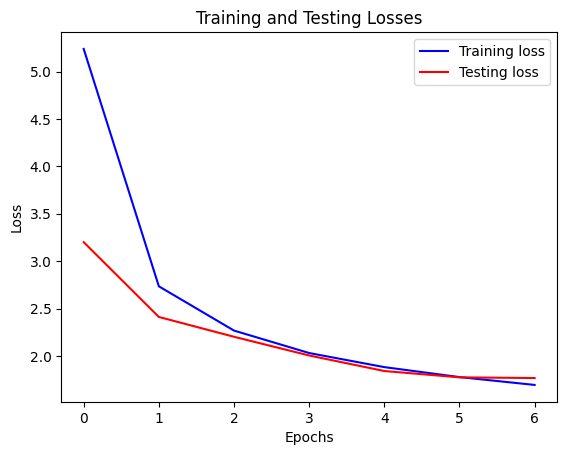

Traing epoch: 7   avg loss is: 1.628872355360117
Testing epoch: 7   avg testing loss is: 1.6701335851392598
Testing on epoch: 7 has accuracy: top1: 87.58 top5: 95.59


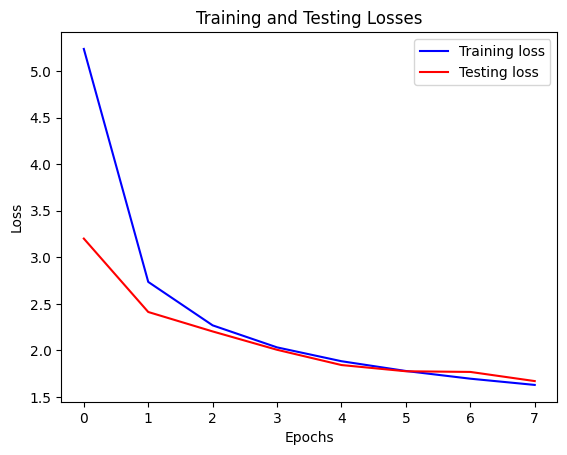

Traing epoch: 8   avg loss is: 1.572229358468438
Testing epoch: 8   avg testing loss is: 1.6061293401866379
Testing on epoch: 8 has accuracy: top1: 88.65 top5: 96.15


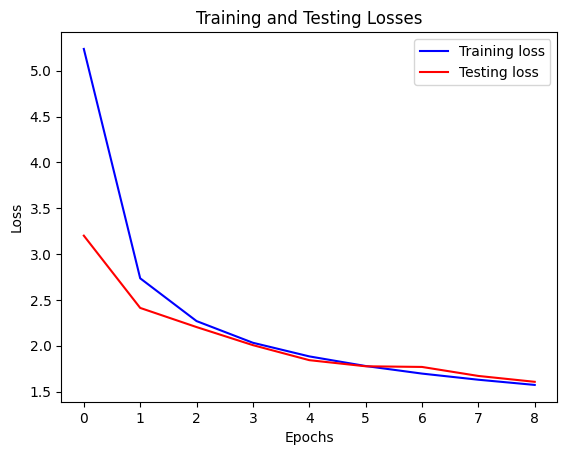

Traing epoch: 9   avg loss is: 1.5271714131444292
Testing epoch: 9   avg testing loss is: 1.6221635392292792
Testing on epoch: 9 has accuracy: top1: 87.88 top5: 96.03


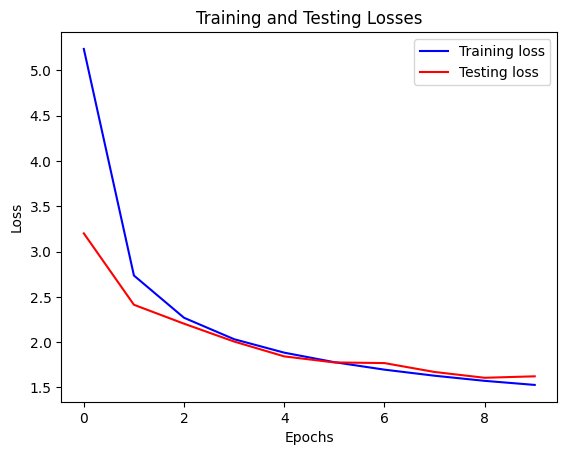

Traing epoch: 10   avg loss is: 1.3799045852850305
Testing epoch: 10   avg testing loss is: 1.4566526403081232
Testing on epoch: 10 has accuracy: top1: 92.17 top5: 97.14


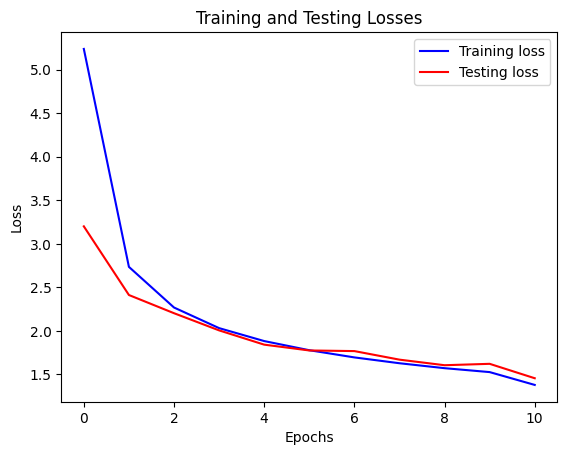

Traing epoch: 11   avg loss is: 1.343805946300712
Testing epoch: 11   avg testing loss is: 1.4436702229198397
Testing on epoch: 11 has accuracy: top1: 92.44 top5: 97.12


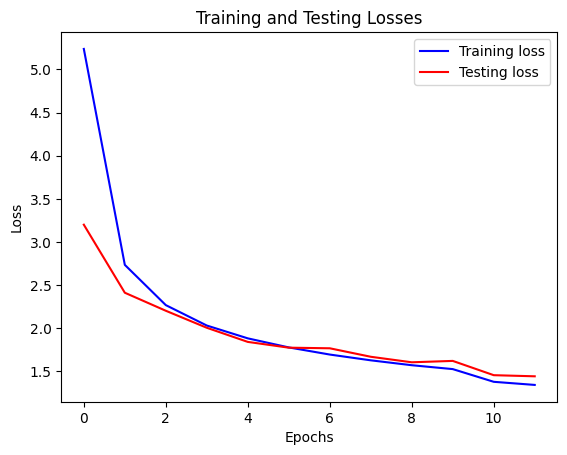

Traing epoch: 12   avg loss is: 1.315537515022798
Testing epoch: 12   avg testing loss is: 1.4437791256089285
Testing on epoch: 12 has accuracy: top1: 92.31 top5: 97.06


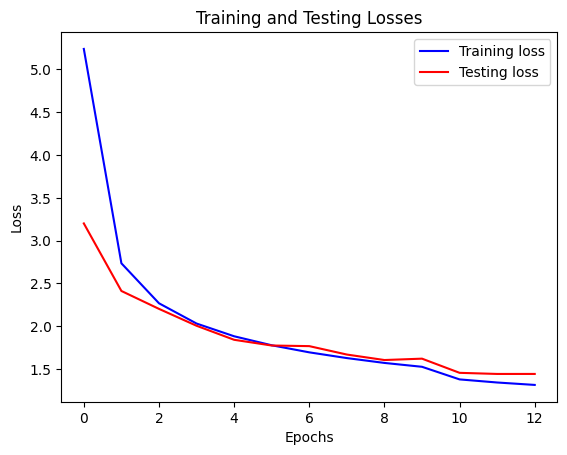

Traing epoch: 13   avg loss is: 1.2934405195078282
Testing epoch: 13   avg testing loss is: 1.409214612239383
Testing on epoch: 13 has accuracy: top1: 92.71 top5: 97.37


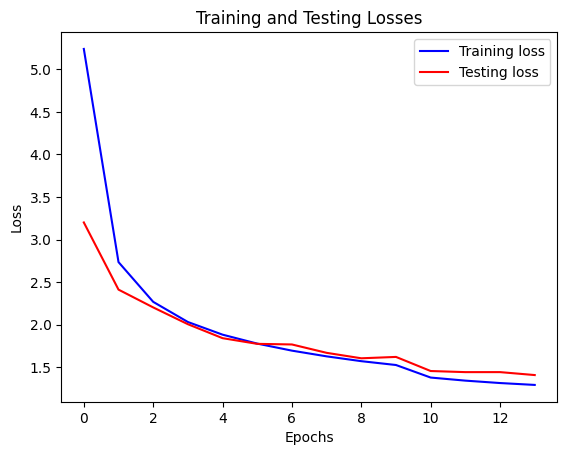

Traing epoch: 14   avg loss is: 1.2754810808728911
Testing epoch: 14   avg testing loss is: 1.432909160574483
Testing on epoch: 14 has accuracy: top1: 92.34 top5: 97.03


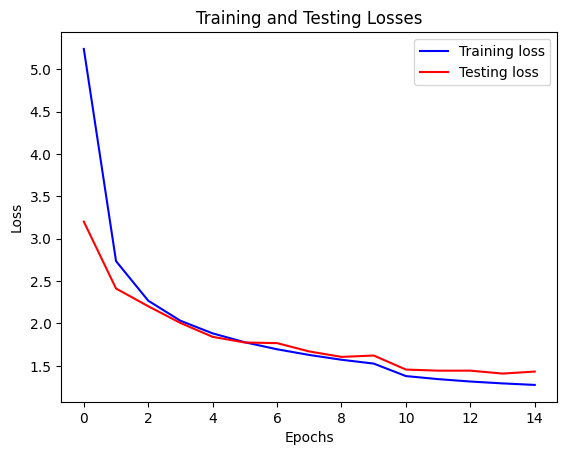

Traing epoch: 15   avg loss is: 1.256607174908229
Testing epoch: 15   avg testing loss is: 1.4069734197824113
Testing on epoch: 15 has accuracy: top1: 92.87 top5: 97.19


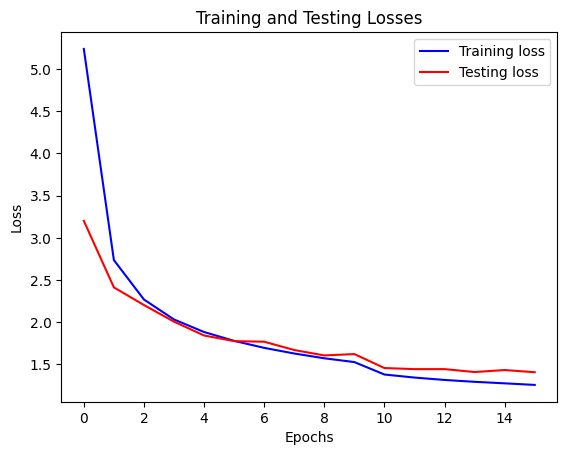

Traing epoch: 16   avg loss is: 1.2395094856314661
Testing epoch: 16   avg testing loss is: 1.402445856894854
Testing on epoch: 16 has accuracy: top1: 92.96 top5: 97.16


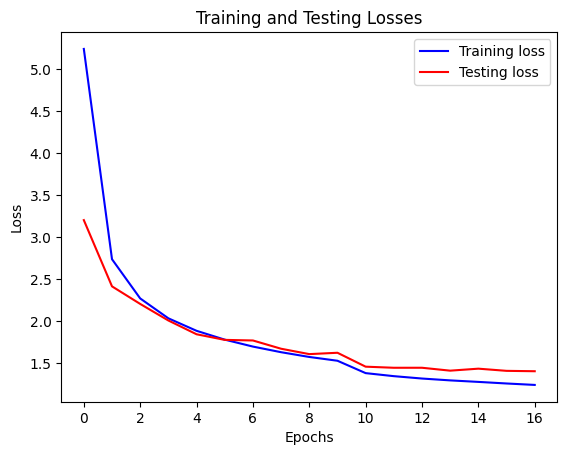

Traing epoch: 17   avg loss is: 1.2238596645170237
Testing epoch: 17   avg testing loss is: 1.3897847007593342
Testing on epoch: 17 has accuracy: top1: 92.84 top5: 97.29


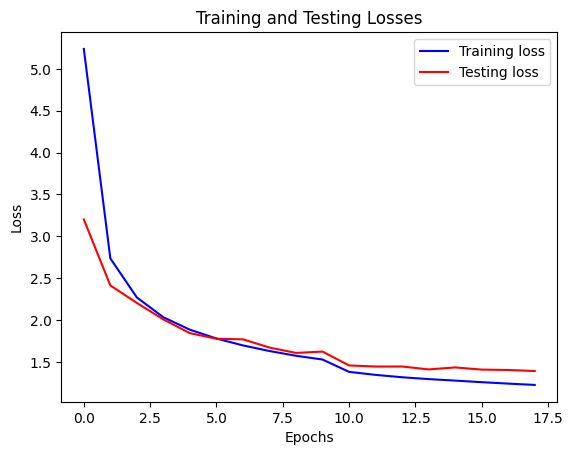

Traing epoch: 18   avg loss is: 1.2109108909729143
Testing epoch: 18   avg testing loss is: 1.3879504580571862
Testing on epoch: 18 has accuracy: top1: 92.94 top5: 97.29


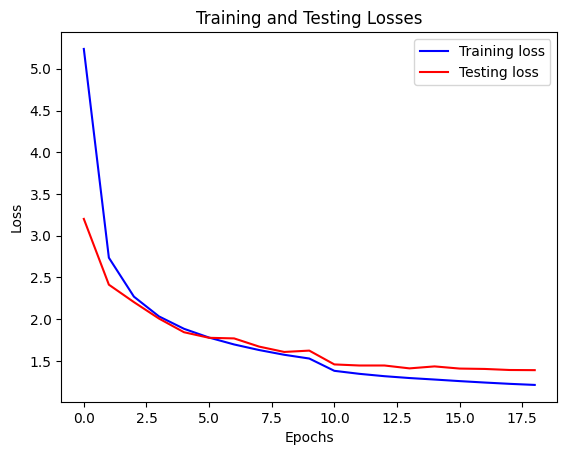

Traing epoch: 19   avg loss is: 1.198167921612317
Testing epoch: 19   avg testing loss is: 1.3718089748540692
Testing on epoch: 19 has accuracy: top1: 93.23 top5: 97.30


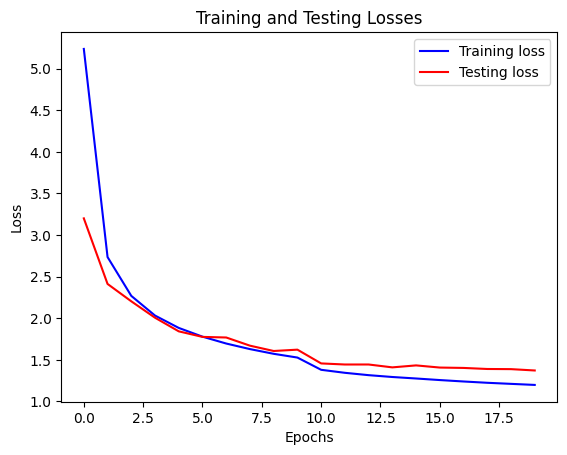

Traing epoch: 20   avg loss is: 1.1374275758295747
Testing epoch: 20   avg testing loss is: 1.3372569887131607
Testing on epoch: 20 has accuracy: top1: 93.98 top5: 97.59


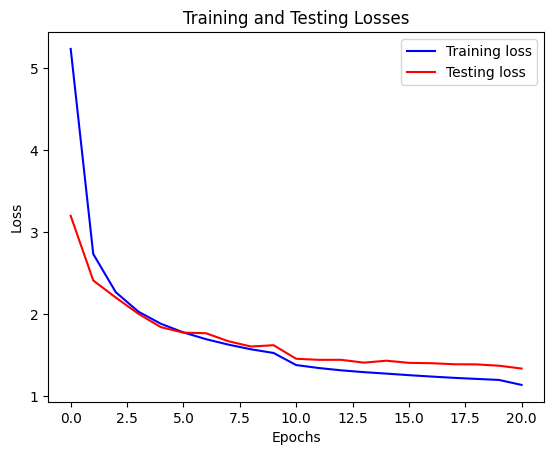

Traing epoch: 21   avg loss is: 1.123486478943236
Testing epoch: 21   avg testing loss is: 1.3350168378859604
Testing on epoch: 21 has accuracy: top1: 94.02 top5: 97.56


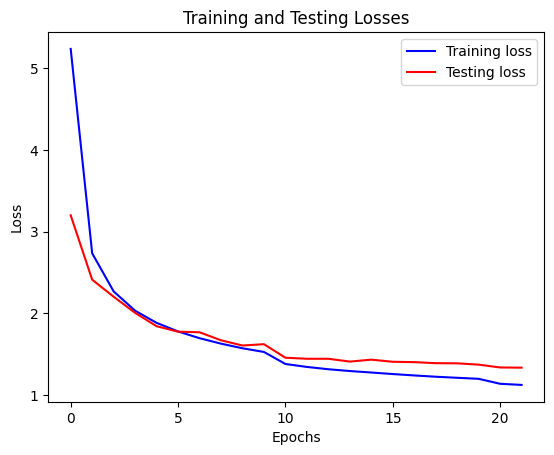

Traing epoch: 22   avg loss is: 1.1143983934028865
Testing epoch: 22   avg testing loss is: 1.326338000495199
Testing on epoch: 22 has accuracy: top1: 94.26 top5: 97.57


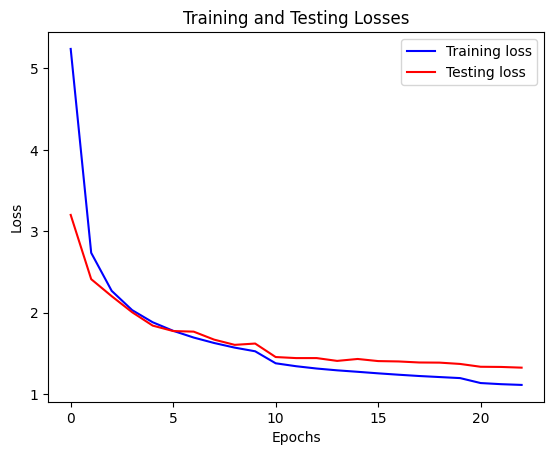

Traing epoch: 23   avg loss is: 1.1065300231338455
Testing epoch: 23   avg testing loss is: 1.338034671575912
Testing on epoch: 23 has accuracy: top1: 93.83 top5: 97.48


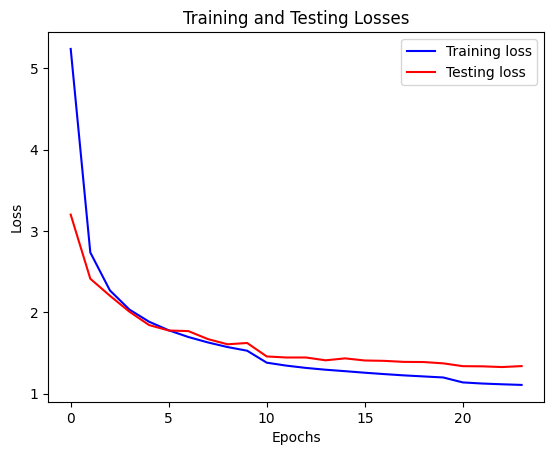

Traing epoch: 24   avg loss is: 1.1012495327860796
Testing epoch: 24   avg testing loss is: 1.3227884151774985
Testing on epoch: 24 has accuracy: top1: 94.04 top5: 97.60


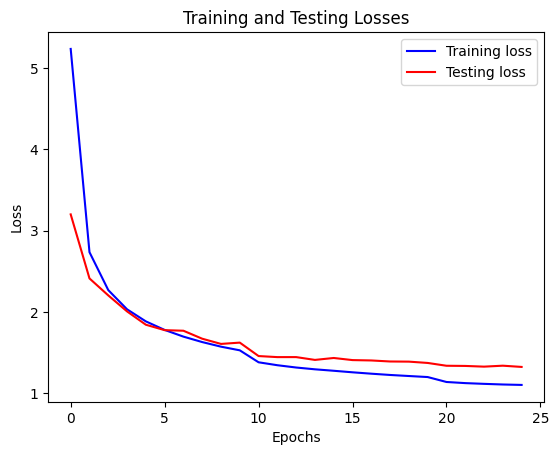

Traing epoch: 25   avg loss is: 1.0960894713212064
Testing epoch: 25   avg testing loss is: 1.3266952719713123
Testing on epoch: 25 has accuracy: top1: 94.12 top5: 97.54


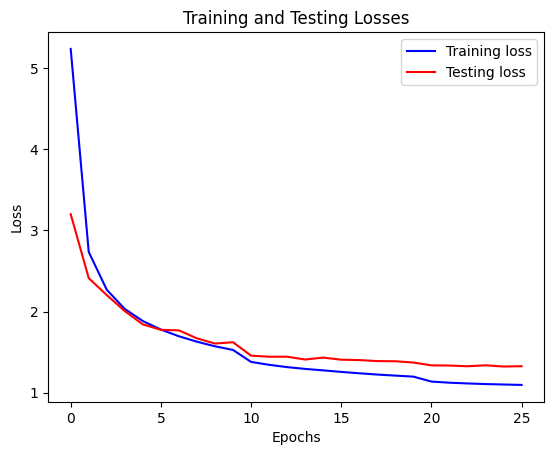

Traing epoch: 26   avg loss is: 1.091044547388329
Testing epoch: 26   avg testing loss is: 1.3214098165689971
Testing on epoch: 26 has accuracy: top1: 93.95 top5: 97.53


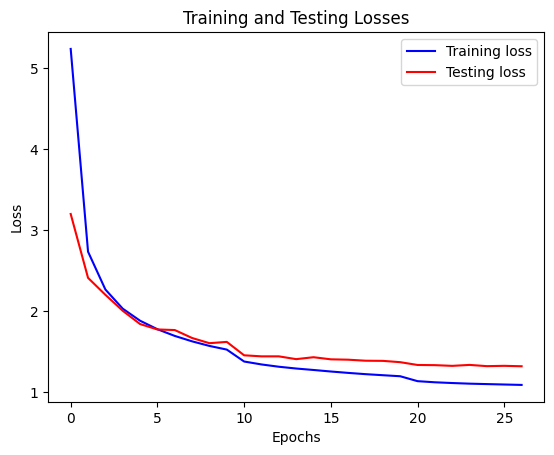

Traing epoch: 27   avg loss is: 1.087010678158928
Testing epoch: 27   avg testing loss is: 1.32034981547242
Testing on epoch: 27 has accuracy: top1: 94.12 top5: 97.47


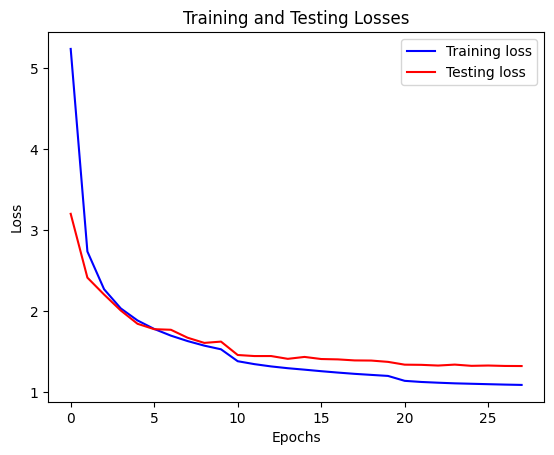

Traing epoch: 28   avg loss is: 1.082397216293392
Testing epoch: 28   avg testing loss is: 1.3123931241158995
Testing on epoch: 28 has accuracy: top1: 94.21 top5: 97.57


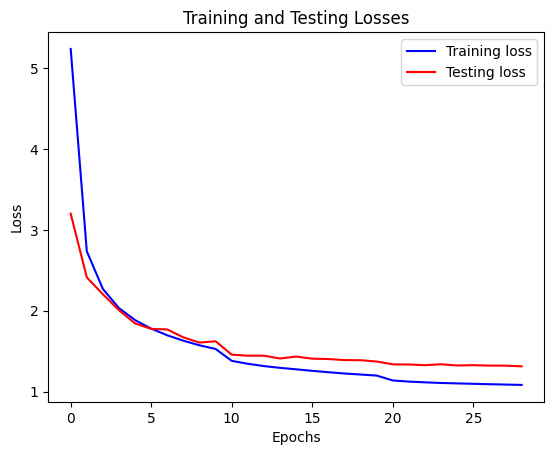

Traing epoch: 29   avg loss is: 1.0792045216591055
Testing epoch: 29   avg testing loss is: 1.3127558052230992
Testing on epoch: 29 has accuracy: top1: 93.95 top5: 97.56


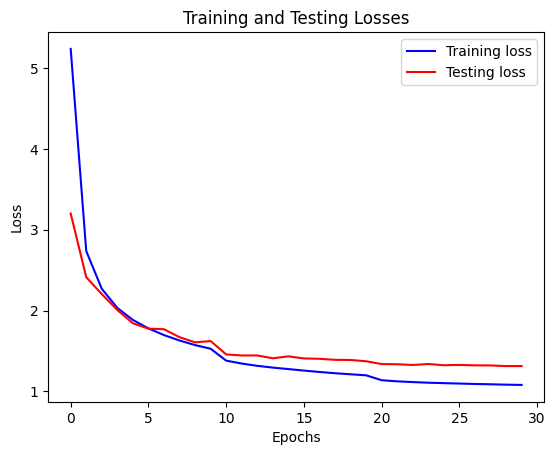

Traing epoch: 30   avg loss is: 1.0581439114788809
Testing epoch: 30   avg testing loss is: 1.2863436823681846
Testing on epoch: 30 has accuracy: top1: 94.63 top5: 97.66


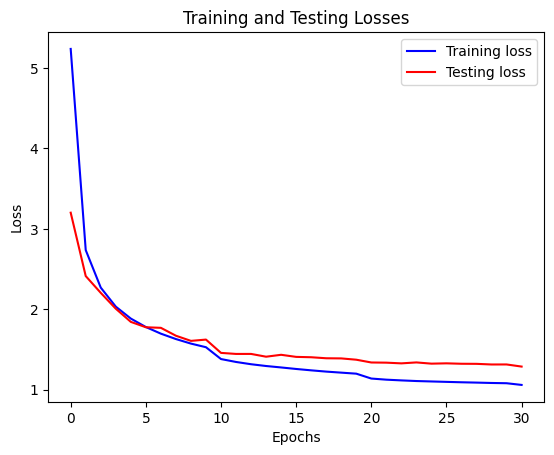

Traing epoch: 31   avg loss is: 1.0528685908836535
Testing epoch: 31   avg testing loss is: 1.2911787502506236
Testing on epoch: 31 has accuracy: top1: 94.61 top5: 97.58


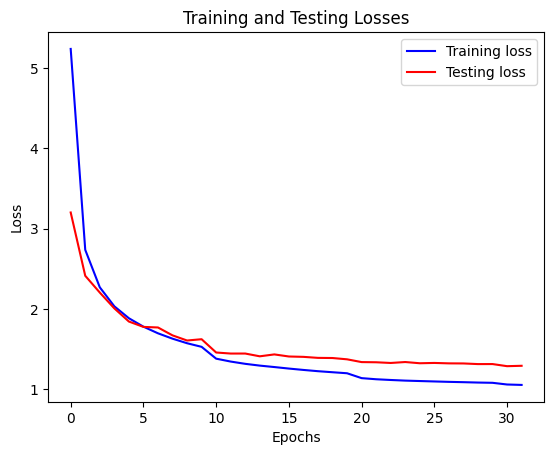

Traing epoch: 32   avg loss is: 1.0500148694598235
Testing epoch: 32   avg testing loss is: 1.284532109443388
Testing on epoch: 32 has accuracy: top1: 94.56 top5: 97.67


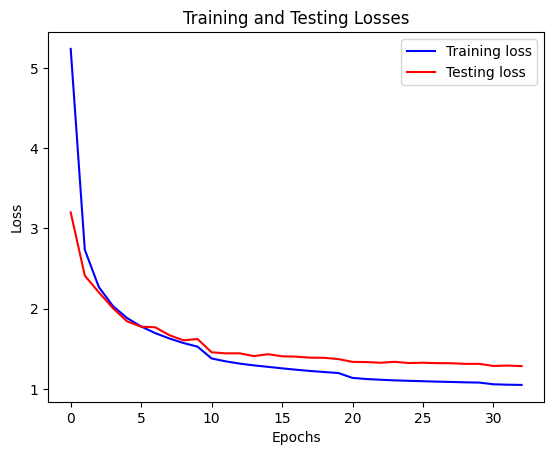

Traing epoch: 33   avg loss is: 1.0476018212181981
Testing epoch: 33   avg testing loss is: 1.286736250170772
Testing on epoch: 33 has accuracy: top1: 94.47 top5: 97.63


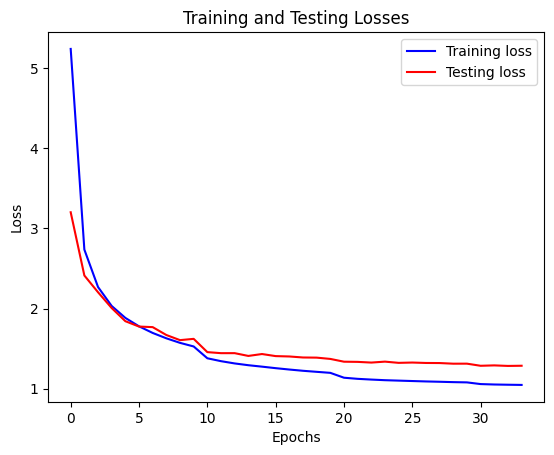

Traing epoch: 34   avg loss is: 1.0450533318146409
Testing epoch: 34   avg testing loss is: 1.2853407480556112
Testing on epoch: 34 has accuracy: top1: 94.48 top5: 97.69


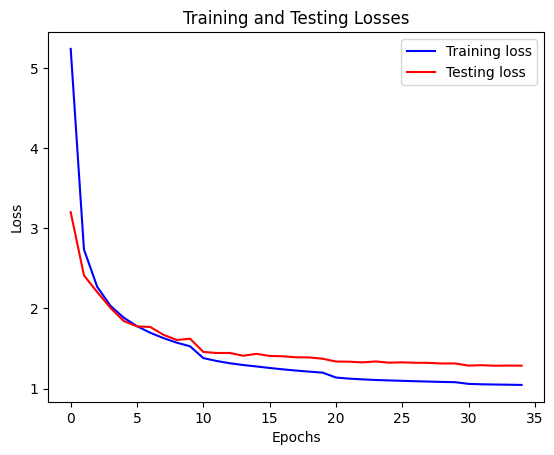

Traing epoch: 35   avg loss is: 1.0436174809287486
Testing epoch: 35   avg testing loss is: 1.2873868576603231
Testing on epoch: 35 has accuracy: top1: 94.43 top5: 97.59


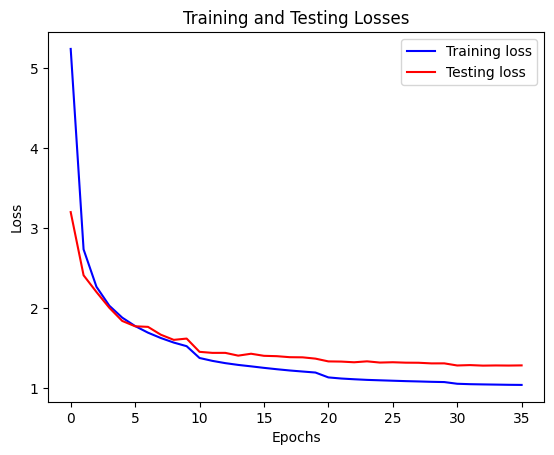

Traing epoch: 36   avg loss is: 1.0414707028007841
Testing epoch: 36   avg testing loss is: 1.2857079321856326
Testing on epoch: 36 has accuracy: top1: 94.47 top5: 97.56


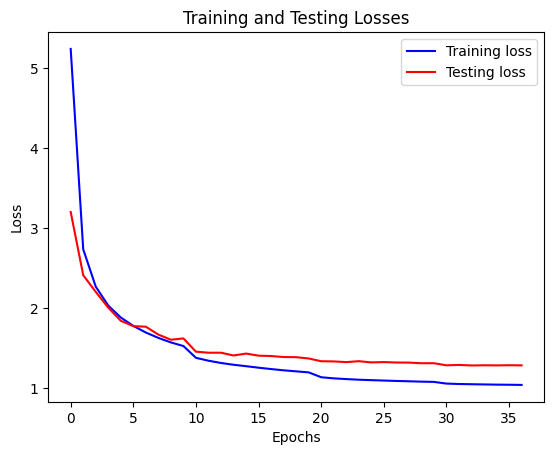

Traing epoch: 37   avg loss is: 1.039844963453261
Testing epoch: 37   avg testing loss is: 1.2865032695735674
Testing on epoch: 37 has accuracy: top1: 94.50 top5: 97.63


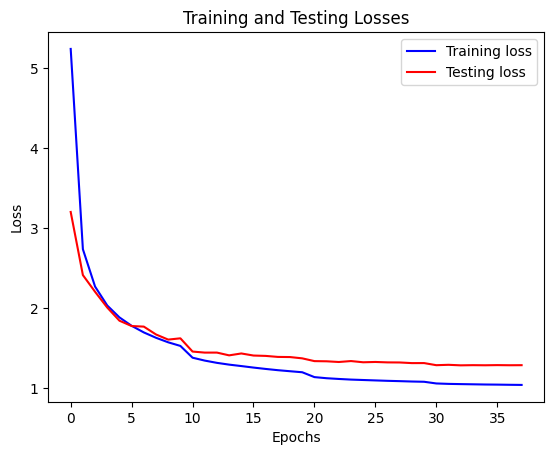

Traing epoch: 38   avg loss is: 1.0381112652713615
Testing epoch: 38   avg testing loss is: 1.2813518774941794
Testing on epoch: 38 has accuracy: top1: 94.52 top5: 97.64


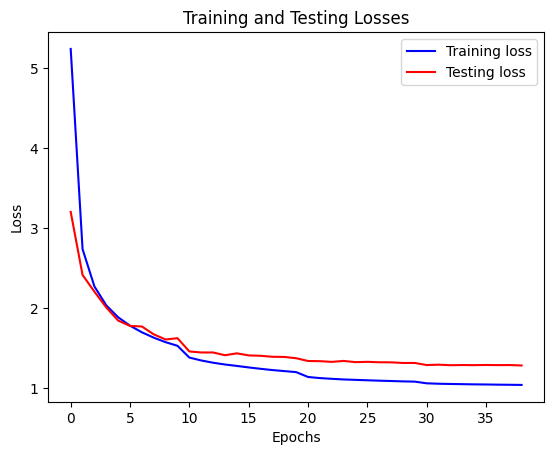

Traing epoch: 39   avg loss is: 1.0370011395655436
Testing epoch: 39   avg testing loss is: 1.2806935701345532
Testing on epoch: 39 has accuracy: top1: 94.55 top5: 97.55


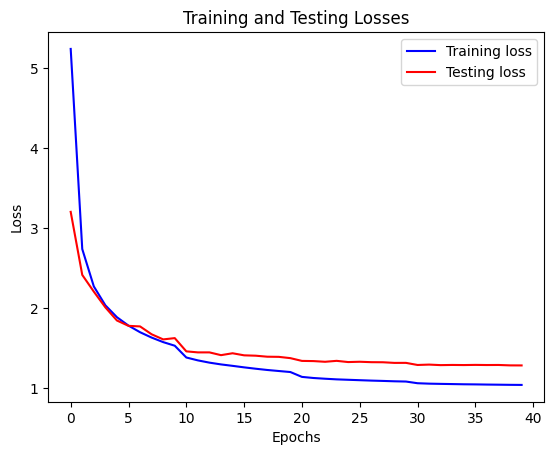

Traing epoch: 40   avg loss is: 1.0289591619796121
Testing epoch: 40   avg testing loss is: 1.2734155720379685
Testing on epoch: 40 has accuracy: top1: 94.80 top5: 97.66


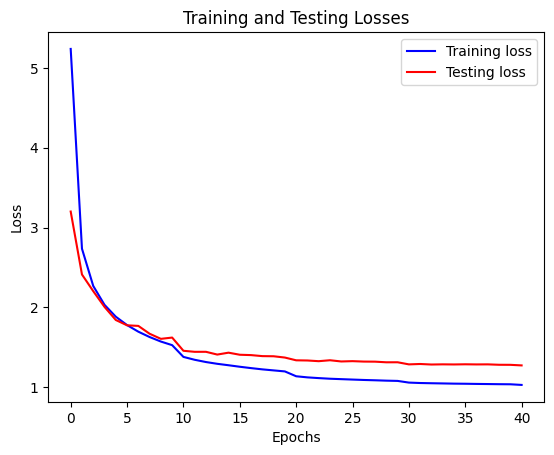

Traing epoch: 41   avg loss is: 1.0267076304323008
Testing epoch: 41   avg testing loss is: 1.2701233891007815
Testing on epoch: 41 has accuracy: top1: 94.73 top5: 97.65


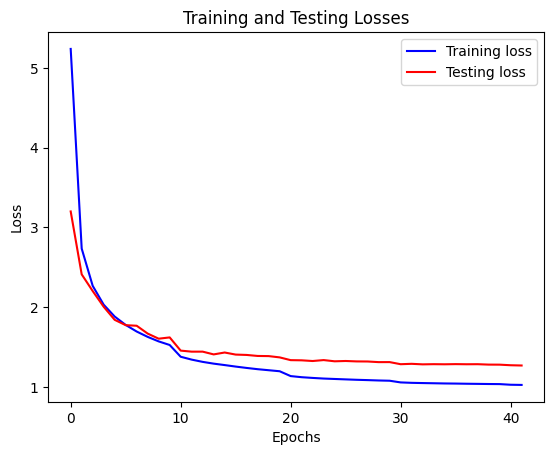

Traing epoch: 42   avg loss is: 1.0253591446882804
Testing epoch: 42   avg testing loss is: 1.2705357159357615
Testing on epoch: 42 has accuracy: top1: 94.80 top5: 97.65


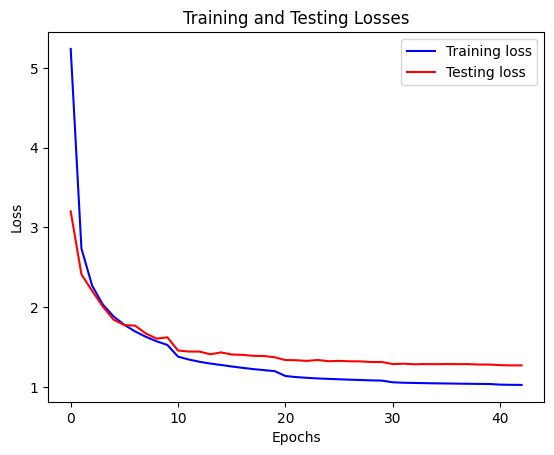

Traing epoch: 43   avg loss is: 1.0243755117485995
Testing epoch: 43   avg testing loss is: 1.2705313962975933
Testing on epoch: 43 has accuracy: top1: 94.76 top5: 97.69


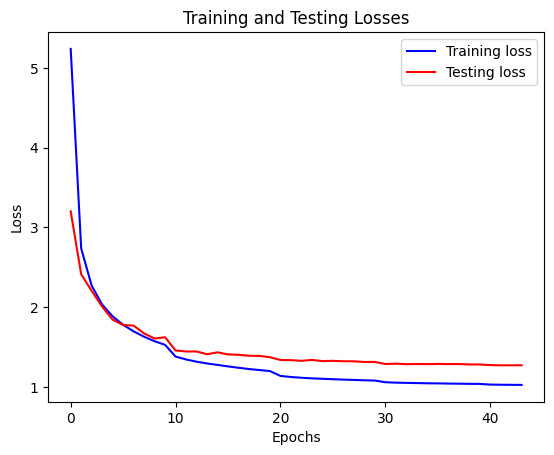

Traing epoch: 44   avg loss is: 1.0235711145097572
Testing epoch: 44   avg testing loss is: 1.2706270318574855
Testing on epoch: 44 has accuracy: top1: 94.63 top5: 97.60


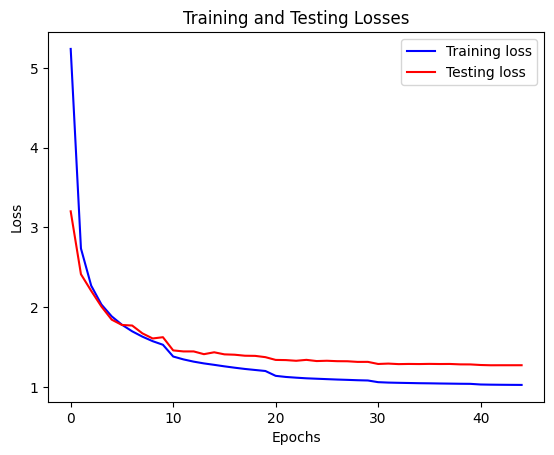

Traing epoch: 45   avg loss is: 1.022419315557371
Testing epoch: 45   avg testing loss is: 1.2735683058209988
Testing on epoch: 45 has accuracy: top1: 94.74 top5: 97.63


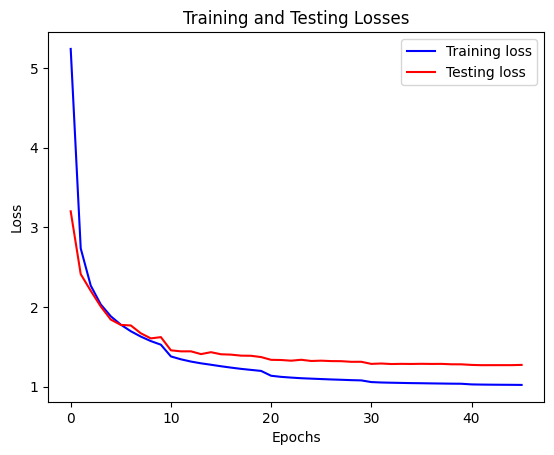

Traing epoch: 46   avg loss is: 1.0219476352646868
Testing epoch: 46   avg testing loss is: 1.2726122890111695
Testing on epoch: 46 has accuracy: top1: 94.65 top5: 97.62


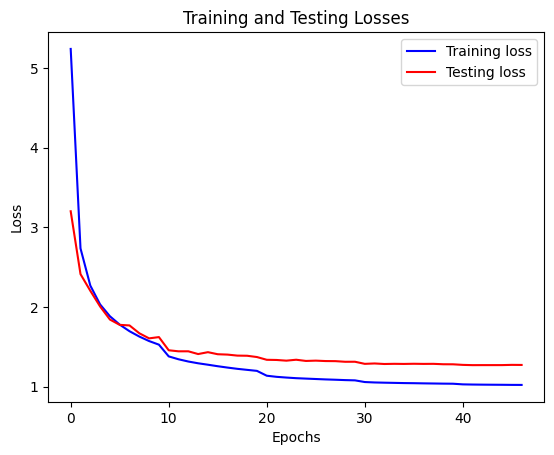

Traing epoch: 47   avg loss is: 1.0210773437744418
Testing epoch: 47   avg testing loss is: 1.2717684735288275
Testing on epoch: 47 has accuracy: top1: 94.67 top5: 97.61


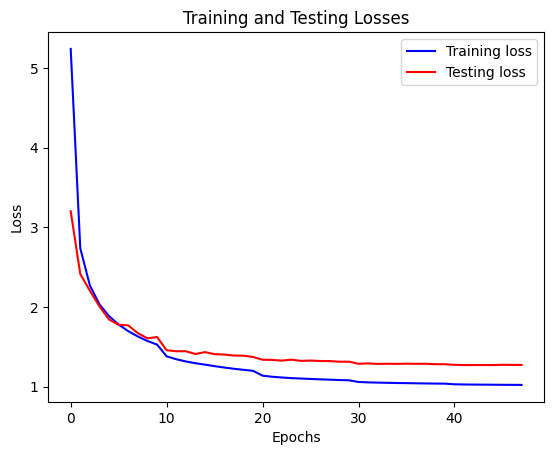

Traing epoch: 48   avg loss is: 1.020295733052991
Testing epoch: 48   avg testing loss is: 1.2711696264039667
Testing on epoch: 48 has accuracy: top1: 94.62 top5: 97.58


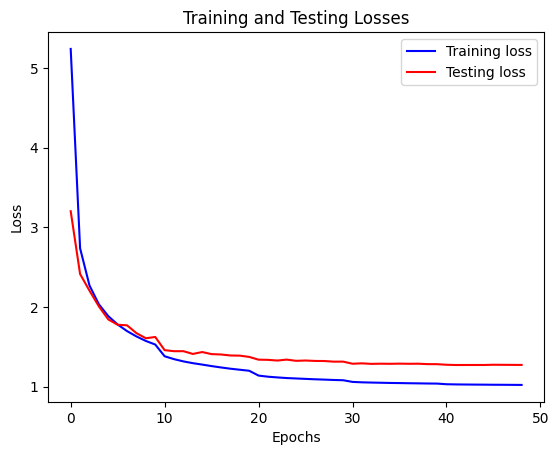

Traing epoch: 49   avg loss is: 1.0195873895536884
Testing epoch: 49   avg testing loss is: 1.271260515457608
Testing on epoch: 49 has accuracy: top1: 94.76 top5: 97.63


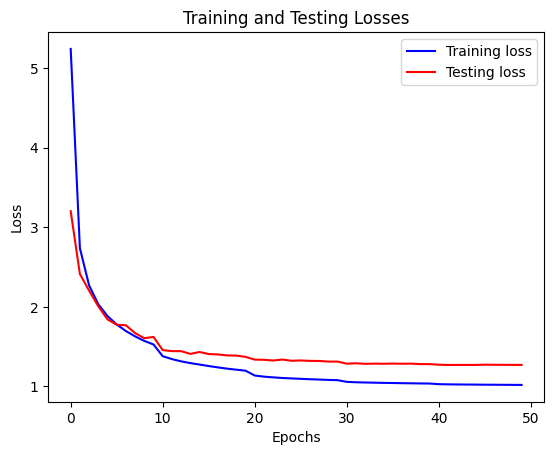

In [3]:
class DeepWriter_Train:
    def __init__(self,dataset='CERUG-EN',imgtype='png',mode='vertical'):

        self.dataset = dataset
        self.folder = dataset
        #self.labelfolder = 'dataset/'

        if not os.path.exists(self.folder):
            if dataset == 'CERUG-EN':
                download_cerug(dataset)
            elif dataset == 'Firemaker':
                download_firemaker(dataset)
            else:
                print('****** Warning: the dataset %s does not existed!******'%dataset)
                print('Please go to the following website to check how to download the dataset:')
                print('https://www.ai.rug.nl/~sheng/writeridataset.html')
                print('*'*20)
                raise ValueError('Dataset: %s does not existed!'%dataset)

        self.labelfolder = self.folder
        self.train_folder = self.folder+'/train/'
        self.test_folder = self.folder+'/test/'

        self.imgtype=imgtype
        self.mode = mode
        self.device = 'cuda'
        self.scale_size=(64,128)

        if self.device == 'cuda':
            torch.backends.cudnn.benchmark = True

        if self.dataset == 'CVL':
            self.imgtype = 'tif'

        self.model_dir = 'model'
        if not os.path.exists(self.model_dir):
            #raise ValueError('Model directory: %s does not existed'%self.model_dir)
            os.mkdir(self.model_dir)#raise ValueError('Model directory: %s does not existed'%self.model_dir)

        #basedir = 'GRRNN_WriterIdentification_dataset_'+self.dataset+'_model_'+self.mode+'_aug_16'
        basedir = 'GRRNN_WriterIdentification_dataset_ICDAR_model_'+self.mode+'_aug_16'
        self.logfile= basedir + '.log'
        self.modelfile = basedir
        self.batch_size = 16

        train_set = DatasetFromFolder(dataset=self.dataset,
        				labelfolder = self.labelfolder,
                        foldername=self.train_folder,
                        imgtype=self.imgtype,
                        scale_size=self.scale_size,
                        is_training = True)

        self.training_data_loader = DataLoader(dataset=train_set, num_workers=2,
                           batch_size=self.batch_size, shuffle=True, drop_last=True)

        test_set = DatasetFromFolder(dataset=self.dataset,
        				labelfolder = self.labelfolder,
                        foldername=self.test_folder,imgtype=self.imgtype,
                        scale_size=self.scale_size,
                        is_training = False)

        self.testing_data_loader = DataLoader(dataset=test_set, num_workers=2,
                           batch_size=self.batch_size, shuffle=False)

        num_class = train_set.num_writer
        self.model = GrnnNet(1,num_classes=train_set.num_writer).to(self.device)

        #self.criterion = nn.CrossEntropyLoss()
        self.criterion = LabelSomCE()
        self.optimizer = optim.Adam(self.model.parameters(),lr=0.0001,weight_decay=1e-4)
        self.scheduler = lr_scheduler.StepLR(self.optimizer,step_size=10,gamma=0.5)


    def train(self,epoch):
        self.model.train()
        losstotal = []

        for iteration,batch in enumerate(self.training_data_loader,1):
            inputs = batch[0].to(self.device).float()
            target = batch[1].type(torch.long).to(self.device)

            self.optimizer.zero_grad()

            logits = self.model(inputs)

            train_loss= self.criterion(logits,target)

            losstotal.append(train_loss.item())
            train_loss.backward()
            self.optimizer.step()

        with open(self.logfile,'a') as fp:
            fp.write('Training epoch %d avg loss is: %.6f\n'%(epoch,np.mean(losstotal)))
        print('Traing epoch:',epoch,'  avg loss is:',np.mean(losstotal))


        return np.mean(losstotal)


    def test(self,epoch,during_train=True):
        self.model.eval()
        losstotal = []

        if not during_train:
            self.load_model(epoch)

        top1 = 0
        top5 = 0
        ntotal=0

        for iteration,batch in enumerate(self.testing_data_loader,1):
            inputs = batch[0].to(self.device).float()
            target = batch[1].to(self.device).long()

            logits = self.model(inputs)

            test_loss = self.criterion(logits,target)

            losstotal.append(test_loss.item())

            res = self.accuracy(logits,target,topk=(1,5))
            top1 += res[0]
            top5 += res[1]

            ntotal += inputs.size(0)



        top1 /= float(ntotal)
        top5 /= float(ntotal)

        print('Testing epoch:',epoch,'  avg testing loss is:',np.mean(losstotal))
        print('Testing on epoch: %d has accuracy: top1: %.2f top5: %.2f'%(epoch,top1*100,top5*100))
        with open(self.logfile,'a') as fp:
            fp.write('Testing epoch %d accuracy is: top1: %.2f top5: %.2f\n'%(epoch,top1*100,top5*100))

        return np.mean(losstotal)



    def check_exists(self,epoch):
        model_out_path = self.model_dir + '/' + self.modelfile + '-model_epoch_{}.pth'.format(epoch)
        return os.path.exists(model_out_path)

    def checkpoint(self,epoch):
        model_out_path = self.model_dir + '/' + self.modelfile + '-model_epoch_{}.pth'.format(epoch)
        torch.save(self.model.state_dict(),model_out_path)


    def load_model(self,epoch):
        model_out_path = self.model_dir + '/' + self.modelfile + '-model_epoch_{}.pth'.format(epoch)
        self.model.load_state_dict(torch.load(model_out_path,map_location=self.device))
        print('Load model successful')

    def plot_losses(self, training_losses, testing_losses):
        indices = range(len(training_losses))
        plt.plot(indices, training_losses, 'b', label='Training loss')
        plt.plot(indices, testing_losses, 'r', label='Testing loss')
        plt.title('Training and Testing Losses')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.show()

    def train_loops(self,start_epoch,num_epoch):
        #if self.check_exists(num_epoch): return
        if start_epoch > 0:
            self.load_model(start_epoch-1)

        training_losses = []
        testing_losses = []

        for epoch in range(start_epoch,num_epoch):
            train_loss = self.train(epoch)
            training_losses.append(train_loss)
            self.checkpoint(epoch)
            test_loss = self.test(epoch)
            testing_losses.append(test_loss)
            self.scheduler.step()
            self.plot_losses(training_losses, testing_losses)


    def accuracy(self,output,target,topk=(1,)):
        with torch.no_grad():
            maxk = max(topk)
            _,pred = output.topk(maxk,1,True,True)
            pred = pred.t()
            correct = pred.eq(target.view(1, -1).expand_as(pred))

            res = []
            for k in topk:
                correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
                res.append(correct_k.data.cpu().numpy())

        return res





if __name__ == '__main__':

    modelist = ['vertical','horizontal']
    mode = modelist[1]

    mod = DeepWriter_Train(dataset='/kaggle/input/icdar19-wsegs/icdar19_wsegs',mode=mode)
    mod.train_loops(0,50)